# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
import pylab as pl
import numpy as np


In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables relative to whether someone got admitted or not. Think in terms of for a certain prestige level, how many people got admitted and didnt get admitted

In [4]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['prestige'], df['admit'],margins=True)


admit,0,1,All
prestige,,,
1.0,28,33,61
2.0,95,53,148
3.0,93,28,121
4.0,55,12,67
All,271,126,397


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [5]:
df2 = df.join(pd.get_dummies(df['prestige'],prefix="prestige"))

In [6]:
df2.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [7]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(df2.ix[:, 'prestige_1.0':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(df2['prestige_1.0'], df['admit'],margins=True)

admit,0,1,All
prestige_1.0,,,
0,243,93,336
1,28,33,61
All,271,126,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [9]:
a = 33/61.

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [10]:
b = 93/336.

#### 3.3 Calculate the odds ratio

In [11]:
print a/b

1.95452141724


#### 3.4 Write this finding in a sentenance: 

Answer: Attending a #1 ranked college increases your chances of admission by 95%

#### 3.5 Print the cross tab for prestige_4

In [12]:
pd.crosstab(df2['prestige_4.0'], df['admit'],margins=True)

admit,0,1,All
prestige_4.0,,,
0,216,114,330
1,55,12,67
All,271,126,397


#### 3.6 Calculate the OR 

In [13]:
c = 12/67.
d = 114/330.

print c
print d
print c/d

0.179104477612
0.345454545455
0.518460329929


#### 3.7 Write this finding in a sentence

Answer: Attending a #4 ranked college decreases your chances of admission by 48%

## Part 4. Analysis

In [14]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df2[cols_to_keep].join(df2.ix[:, 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [15]:
# manually add the intercept
data['intercept'] = 1.0
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61             0             1             0        1.0
1      1  660.0  3.67             0             1             0        1.0
2      1  800.0  4.00             0             0             0        1.0
3      1  640.0  3.19             0             0             1        1.0
4      0  520.0  2.93             0             0             1        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [16]:
train_cols = data[['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]
train_cols.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,380.0,3.61,0,1,0
1,660.0,3.67,0,1,0
2,800.0,4.00,0,0,0
3,640.0,3.19,0,0,1
4,520.0,2.93,0,0,1


#### 4.2 Fit the model

In [17]:
y = data[['admit']]

In [18]:
admission = logit('y ~ train_cols', data).fit()
print admission.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 May 2017   Pseudo R-squ.:                 0.08166
Time:                        21:42:31   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -3.8769      1.142     -3.393      0.001        -6.116    -1.638
train_cols[0]     0.

In [35]:
admission_coef = [[.0022,.7793,-.6801,-1.3387,-1.5534]]
admission_int = -3.8769
admission_coef_conf = [[7.44e-05, 0.004],[0.128, 1.431], [-1.301, -0.059], [-2.015, -0.663], [-2.372, -0.735]]

In [29]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [30]:
lm.fit(train_cols, data['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 4.3 Print the summary results

In [31]:
print lm.coef_
print lm.intercept_
print data.admit.mean()
print lm.score(train_cols, data['admit'])
#Different results than when using statsmodel and logit function

[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]
[-1.81701706]
0.317380352645
0.705289672544


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [32]:
print np.exp(lm.coef_)

[[ 1.00178657  1.26149128  0.546908    0.3097005   0.25225925]]


In [36]:
print np.exp(admission_coef)
print np.exp(admission_coef_conf)
print np.exp(admission_int)

[[ 1.00220242  2.17994577  0.50656633  0.26218629  0.21152756]]
[[ 1.0000744   1.00400801]
 [ 1.136553    4.18287998]
 [ 0.2722594   0.94270677]
 [ 0.1333204   0.5153031 ]
 [ 0.09329395  0.47950546]]
0.0207149420696


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of a student who attends an undergraduate school ranked #2 in prestige is about 45% less likely to be admitted to grad school than a student who attends an undergraduate school ranked #1 in prestige.

#### 4.6 Interpret the OR of GPA

Answer: A point (1.0) increase in GPA increases a student's odds of admission to grad school by about 26%

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [36]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [37]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [44]:
combos.head()

,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [56]:
# recreate the dummy variables
admission_data = combos.join(pd.get_dummies(combos.ix[:, 2],prefix="prestige"))
# keep only what we need for making predictions
admission_data2 = admission_data[[ 0, 1, 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]
admission_data2.tail()

,0,1,prestige_2.0,prestige_3.0,prestige_4.0
395,800.0,3.806667,0,0,1
396,800.0,4.000000,0,0,0
397,800.0,4.000000,1,0,0
398,800.0,4.000000,0,1,0
399,800.0,4.000000,0,0,1


#### 5.2 Make predictions on the enumerated dataset

In [65]:
admission_data2['probability'] = lm.predict_proba(admission_data2[[ 0, 1, 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]).T[1]

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
admission_data2.tail()

,0,1,prestige_2.0,prestige_3.0,prestige_4.0,probability
395,800.0,3.806667,0,0,1,0.292749
396,800.0,4.000000,0,0,0,0.631845
397,800.0,4.000000,1,0,0,0.484171
398,800.0,4.000000,0,1,0,0.347055
399,800.0,4.000000,0,0,1,0.302133


#### 5.3 Interpret findings for the last 4 observations

Answer: For students with a perfect GRE and GPA, the prestige of their undergraduate institution still plays a large role. For example, students who attend a #1 ranked institution have a about a 31% higher probability of admission than those who attend a #2 ranked institution.

In [83]:
admission_data3 = admission_data2.join(admission_data[['prestige_1.0']])
admission_data3.tail()

,0,1,prestige_2.0,prestige_3.0,prestige_4.0,probability,prestige_1.0
395,800.0,3.806667,0,0,1,0.292749,0
396,800.0,4.000000,0,0,0,0.631845,1
397,800.0,4.000000,1,0,0,0.484171,0
398,800.0,4.000000,0,1,0,0.347055,0
399,800.0,4.000000,0,0,1,0.302133,0


## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

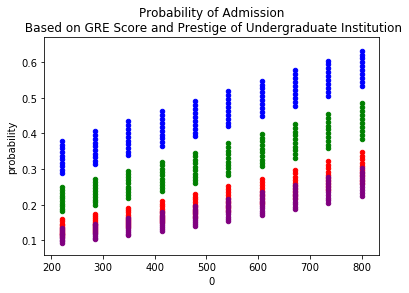

In [86]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    admission_data3[admission_data3[['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0'][e]] == 1].plot(x=0, y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Admission\n Based on GRE Score and Prestige of Undergraduate Institution')

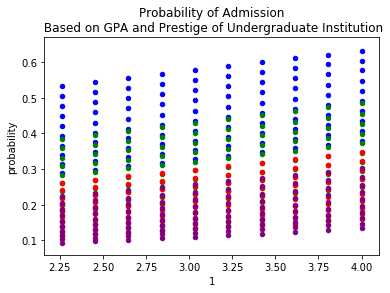

In [87]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    admission_data3[admission_data3[['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0'][e]] == 1].plot(x=1, y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Admission\n Based on GPA and Prestige of Undergraduate Institution')